# Transformers

In [1]:
import os
import sys

os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-07 12:16:47.708177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 12:16:47.721591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 12:16:47.737603: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 12:16:47.742461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 12:16:47.754868: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from config import dev

dev

device(type='cpu')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [ ]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "yelp", sample_size=100_000
)

Loading train tensors: 100%|██████████| 146/146 [03:24<00:00,  1.40s/it]


Sample size:  75000


Loading test tensors: 100%|██████████| 13/13 [00:38<00:00,  2.93s/it]


Test size:  38000
Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([38000, 128, 768])
Train, Val, Test size:  80000 20000 20000
pos:  39792
neg:  40208
pos:  10092
neg:  9908
pos:  9969
neg:  10031


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    # lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=2**8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=True,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=256, out_features=256, bias=False)
        )
        (combine_heads): Linear(in_features=256, out_features=256, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=256, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNor

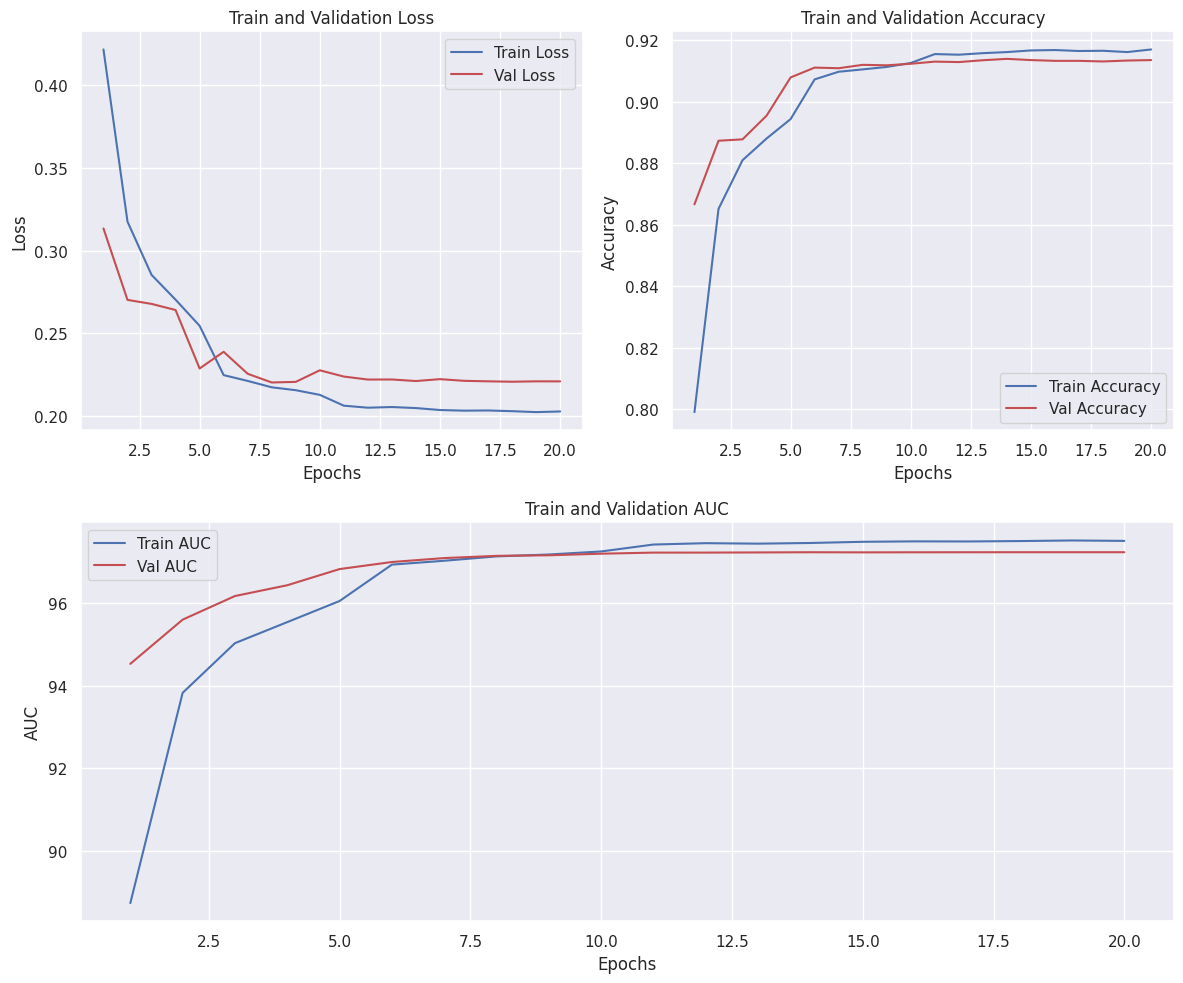

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [11]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    # lr=1e-5,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=True,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
[6144, 8, 64, 64, 64, 64, 8, 8, 128, 16, 128, 8, 8, 8, 64, 64, 64, 64, 8, 8, 128, 16, 128, 8, 8, 8, 8, 8, 8, 1]
The model has 7,313 trainable parameters


Epoch   1/20:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  20/20: 100%|██████████| 1250/1250 [00:34<00:00, 36.52batch/s, Epoch = 0m 34s, Loss = 0.2014|0.2154, Acc = 0.920|0.915, AUC = 97.485|97.348]

TOTAL TIME = 612.95s
BEST ACC = 0.92% AT EPOCH 10
BEST AUC = 97.36 AT EPOCH 10


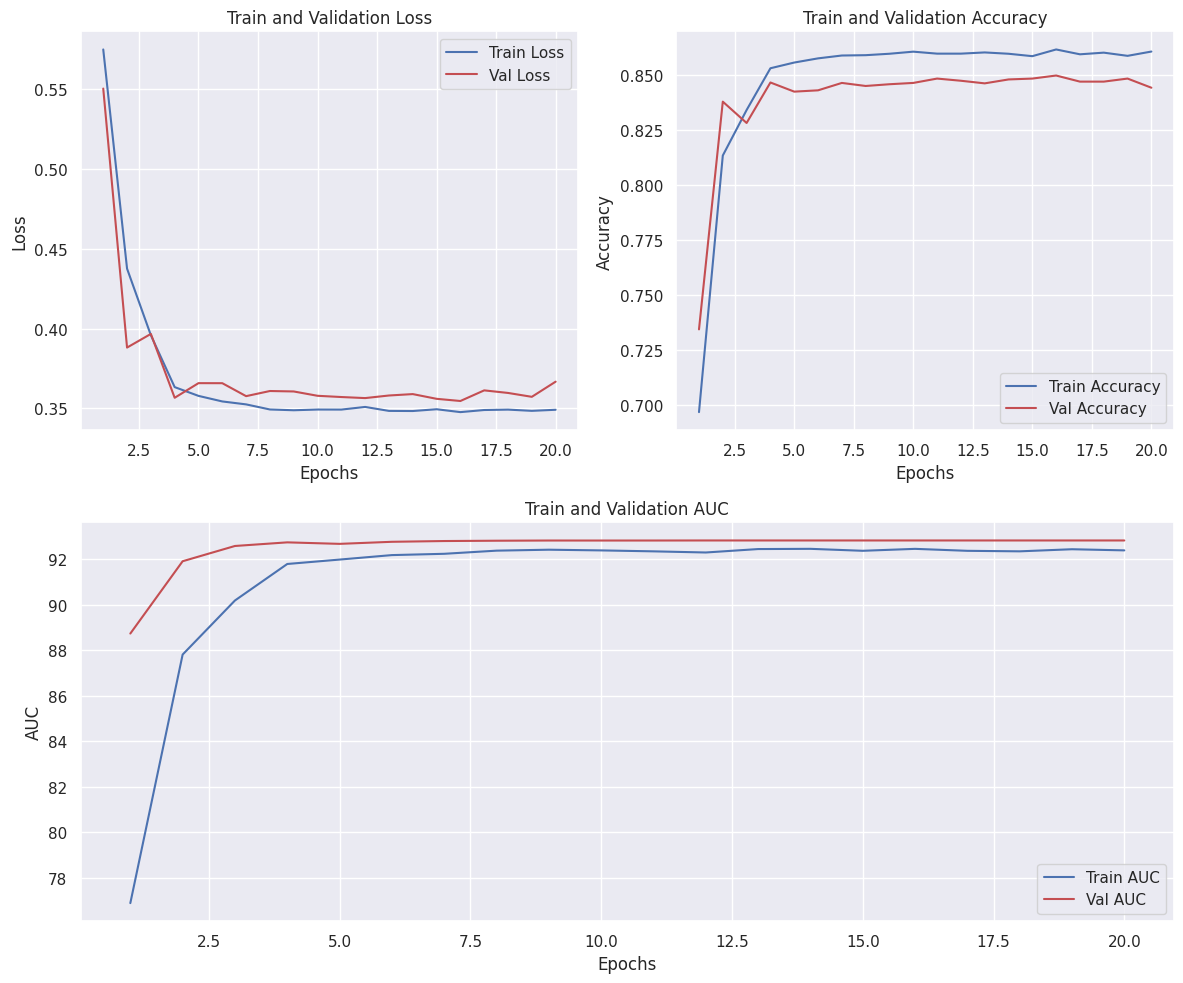

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [13]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "basic",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
[6144, 8, 24, 24, 24, 24, 8, 8, 64, 8, 64, 8, 24, 8, 8, 24, 24, 24, 24, 8, 8, 64, 8, 64, 8, 24, 8, 8, 8, 8, 8, 1]
The model has 6,769 trainable parameters


Epoch   1/10:   0%|          | 0/1250 [00:00<?, ?batch/s]

Epoch  10/10: 100%|██████████| 1250/1250 [28:28<00:00,  1.37s/batch, Epoch = 28m 28s, Loss = 0.3424|0.3287, Acc = 0.856|0.859, AUC = 92.826|93.731]

TOTAL TIME = 17218.87s
BEST ACC = 0.86% AT EPOCH 9
BEST AUC = 93.73 AT EPOCH 10


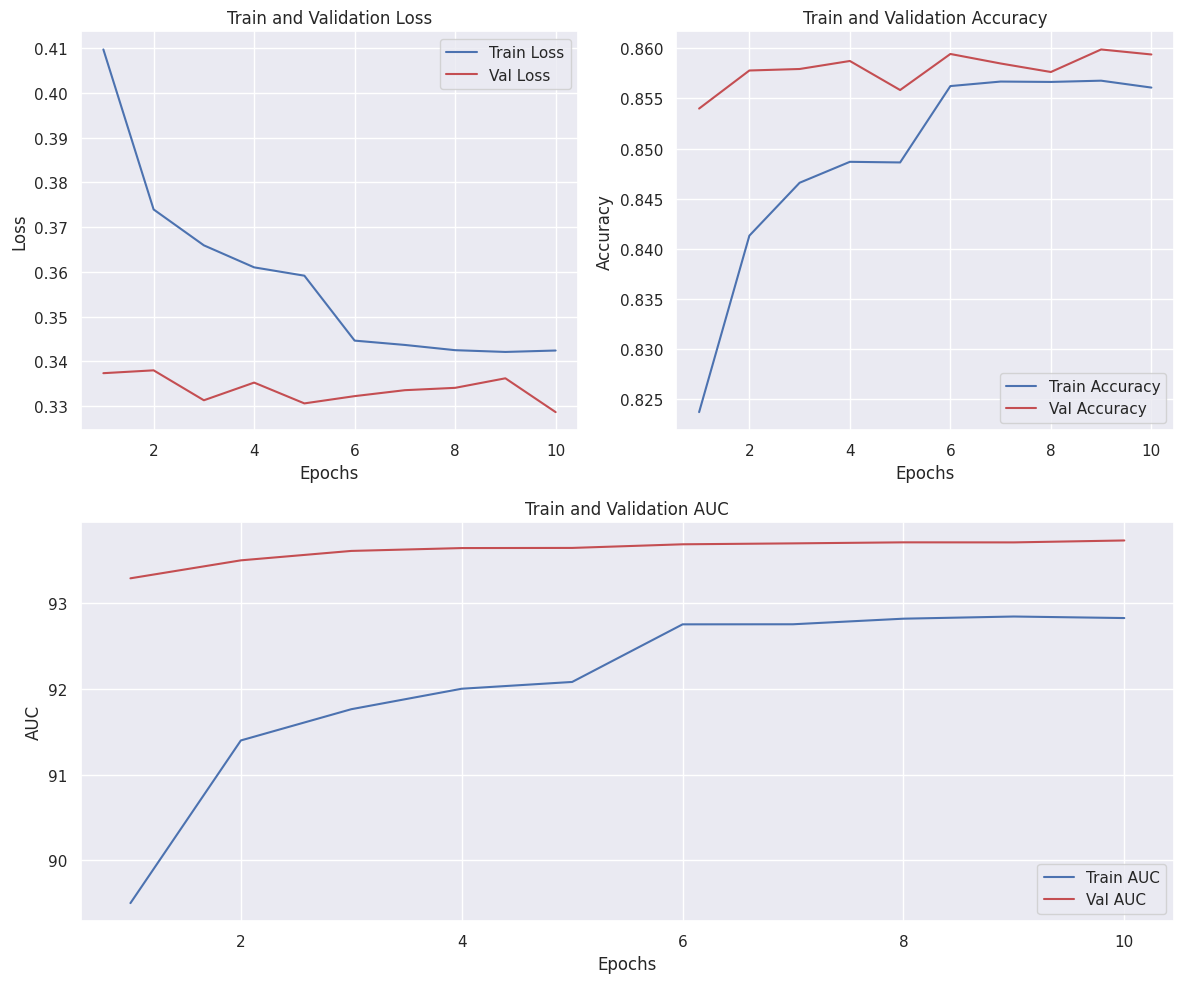

In [14]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [ ]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

In [ ]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)